In [113]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Prepare Data For Siamese Network

Load Data and Labels

In [114]:
train_data_dir = r'C:\Users\jands\Market-1501-v15.09.15\bounding_box_train'

# the image size for all the images in The Market Dataset is 128x64
BATCH_SIZE = 32
IMAGE_SIZE = (128, 64)

dataset = []

In [115]:
file_paths = tf.data.Dataset.list_files(train_data_dir + '/*.jpg')

# Define the function to extract the label from the file name
# works for my specific directory path...
def extract_label(file_path):
    label = tf.strings.split(file_path, '_')
    label = tf.strings.split(label, '\\')
    return int(label[2][1])

def read_and_decode(file_path):
    label = extract_label(file_path)
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label

for file in file_paths:
    dataset.append(read_and_decode(file))

Visualize Data

IMAGE SHAPE:  (128, 64, 3)


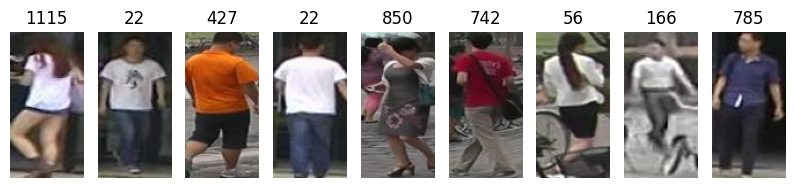

In [116]:
plt.figure(figsize=(10, 10))
subplot_pos = 1

for image, label in dataset[:9]:
  ax = plt.subplot(1, 9, subplot_pos)
  subplot_pos += 1
  plt.imshow(image)
  plt.title(label)
  plt.axis("off")

print("IMAGE SHAPE: ", image.shape)

Make Pairs

In [119]:
dataset = np.array(dataset, dtype=object)
labels = []
for image, label in dataset:
    labels.append(label)

print(len(labels))
label_num = len(np.unique(np.array(labels)))
print(label_num)

12936
751
